In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sys
from sklearn.model_selection import KFold
sys.path.append('C:/Users/w37262do/Documents/git/PyIR/src') # todo
from pyir_spectralcollection import PyIR_SpectralCollection as pir

In [4]:
# Experiment
is_local = True # todo
seed = 0 if is_local else int(sys.argv[-1])
np.random.seed(seed=seed)
balanced = True
even_or_odd = "even" if balanced else "odd" 
annotation_class_colors = np.array([[0,255,0],[128,0,128],[255,0,255],[0,0,255],[255,165,0],[255,0,0]])
annotation_class_names = np.array(['epithelium_n','stroma_n','epithelium_c','stroma_c','corpora_amylacea','blood'])

In [5]:
spectra = np.load(f"./data/data_{even_or_odd}.npy") # todo
labels = np.load(f"./data/labels_{even_or_odd}.npy") # todo
pids = np.load(f"./data/pids_{even_or_odd}.npy") # todo
wavenumbers = np.load("./data/wavenumbers.npy") # todo
print(f"Assembled data with {len(spectra)} samples and {len(labels)} labels and {len(pids)} pids and {len(wavenumbers)} wavenumbers")

Assembled data with 100096 samples and 100096 labels and 100096 pids and 425 wavenumbers


Text(0.5, 1.0, 'mean raw spectra per-class')

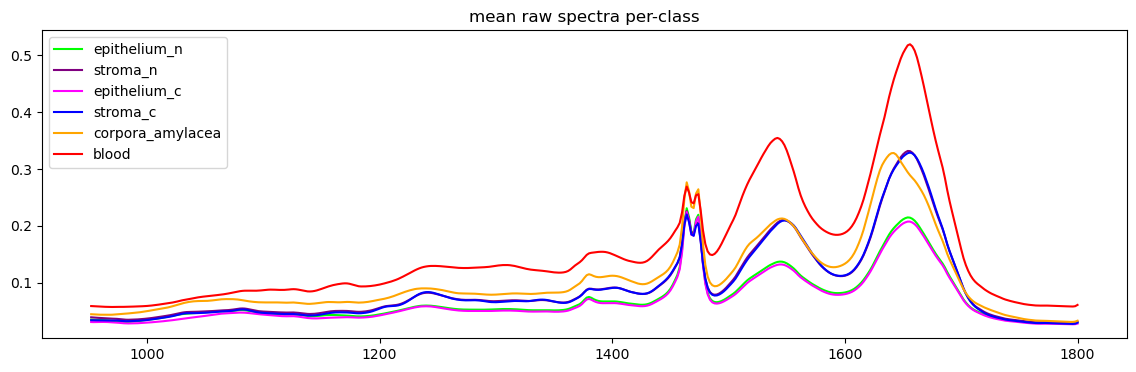

In [6]:
fig,ax = plt.subplots(figsize=(14,4))
for cls in range(len(annotation_class_names)):
    ax.plot(
        wavenumbers,
        np.mean(spectra[np.where(labels == cls)], axis=0),
        color=annotation_class_colors[cls]/255.0,
        label=annotation_class_names[cls]
    )
ax.legend()
ax.set_title("mean raw spectra per-class")

In [8]:
kit = pir()
def preprocess(spectra, wavenumbers, sg_window, sg_order, sg_deriv):
    spectra = kit.all_spec_min2zero(spectra)
    spectra = kit.vector_norm(spectra)
    spectra, wavenumbers = kit.data_deriv(spectra, wavenumbers, sg_window, sg_order, sg_deriv)
    return spectra, wavenumbers



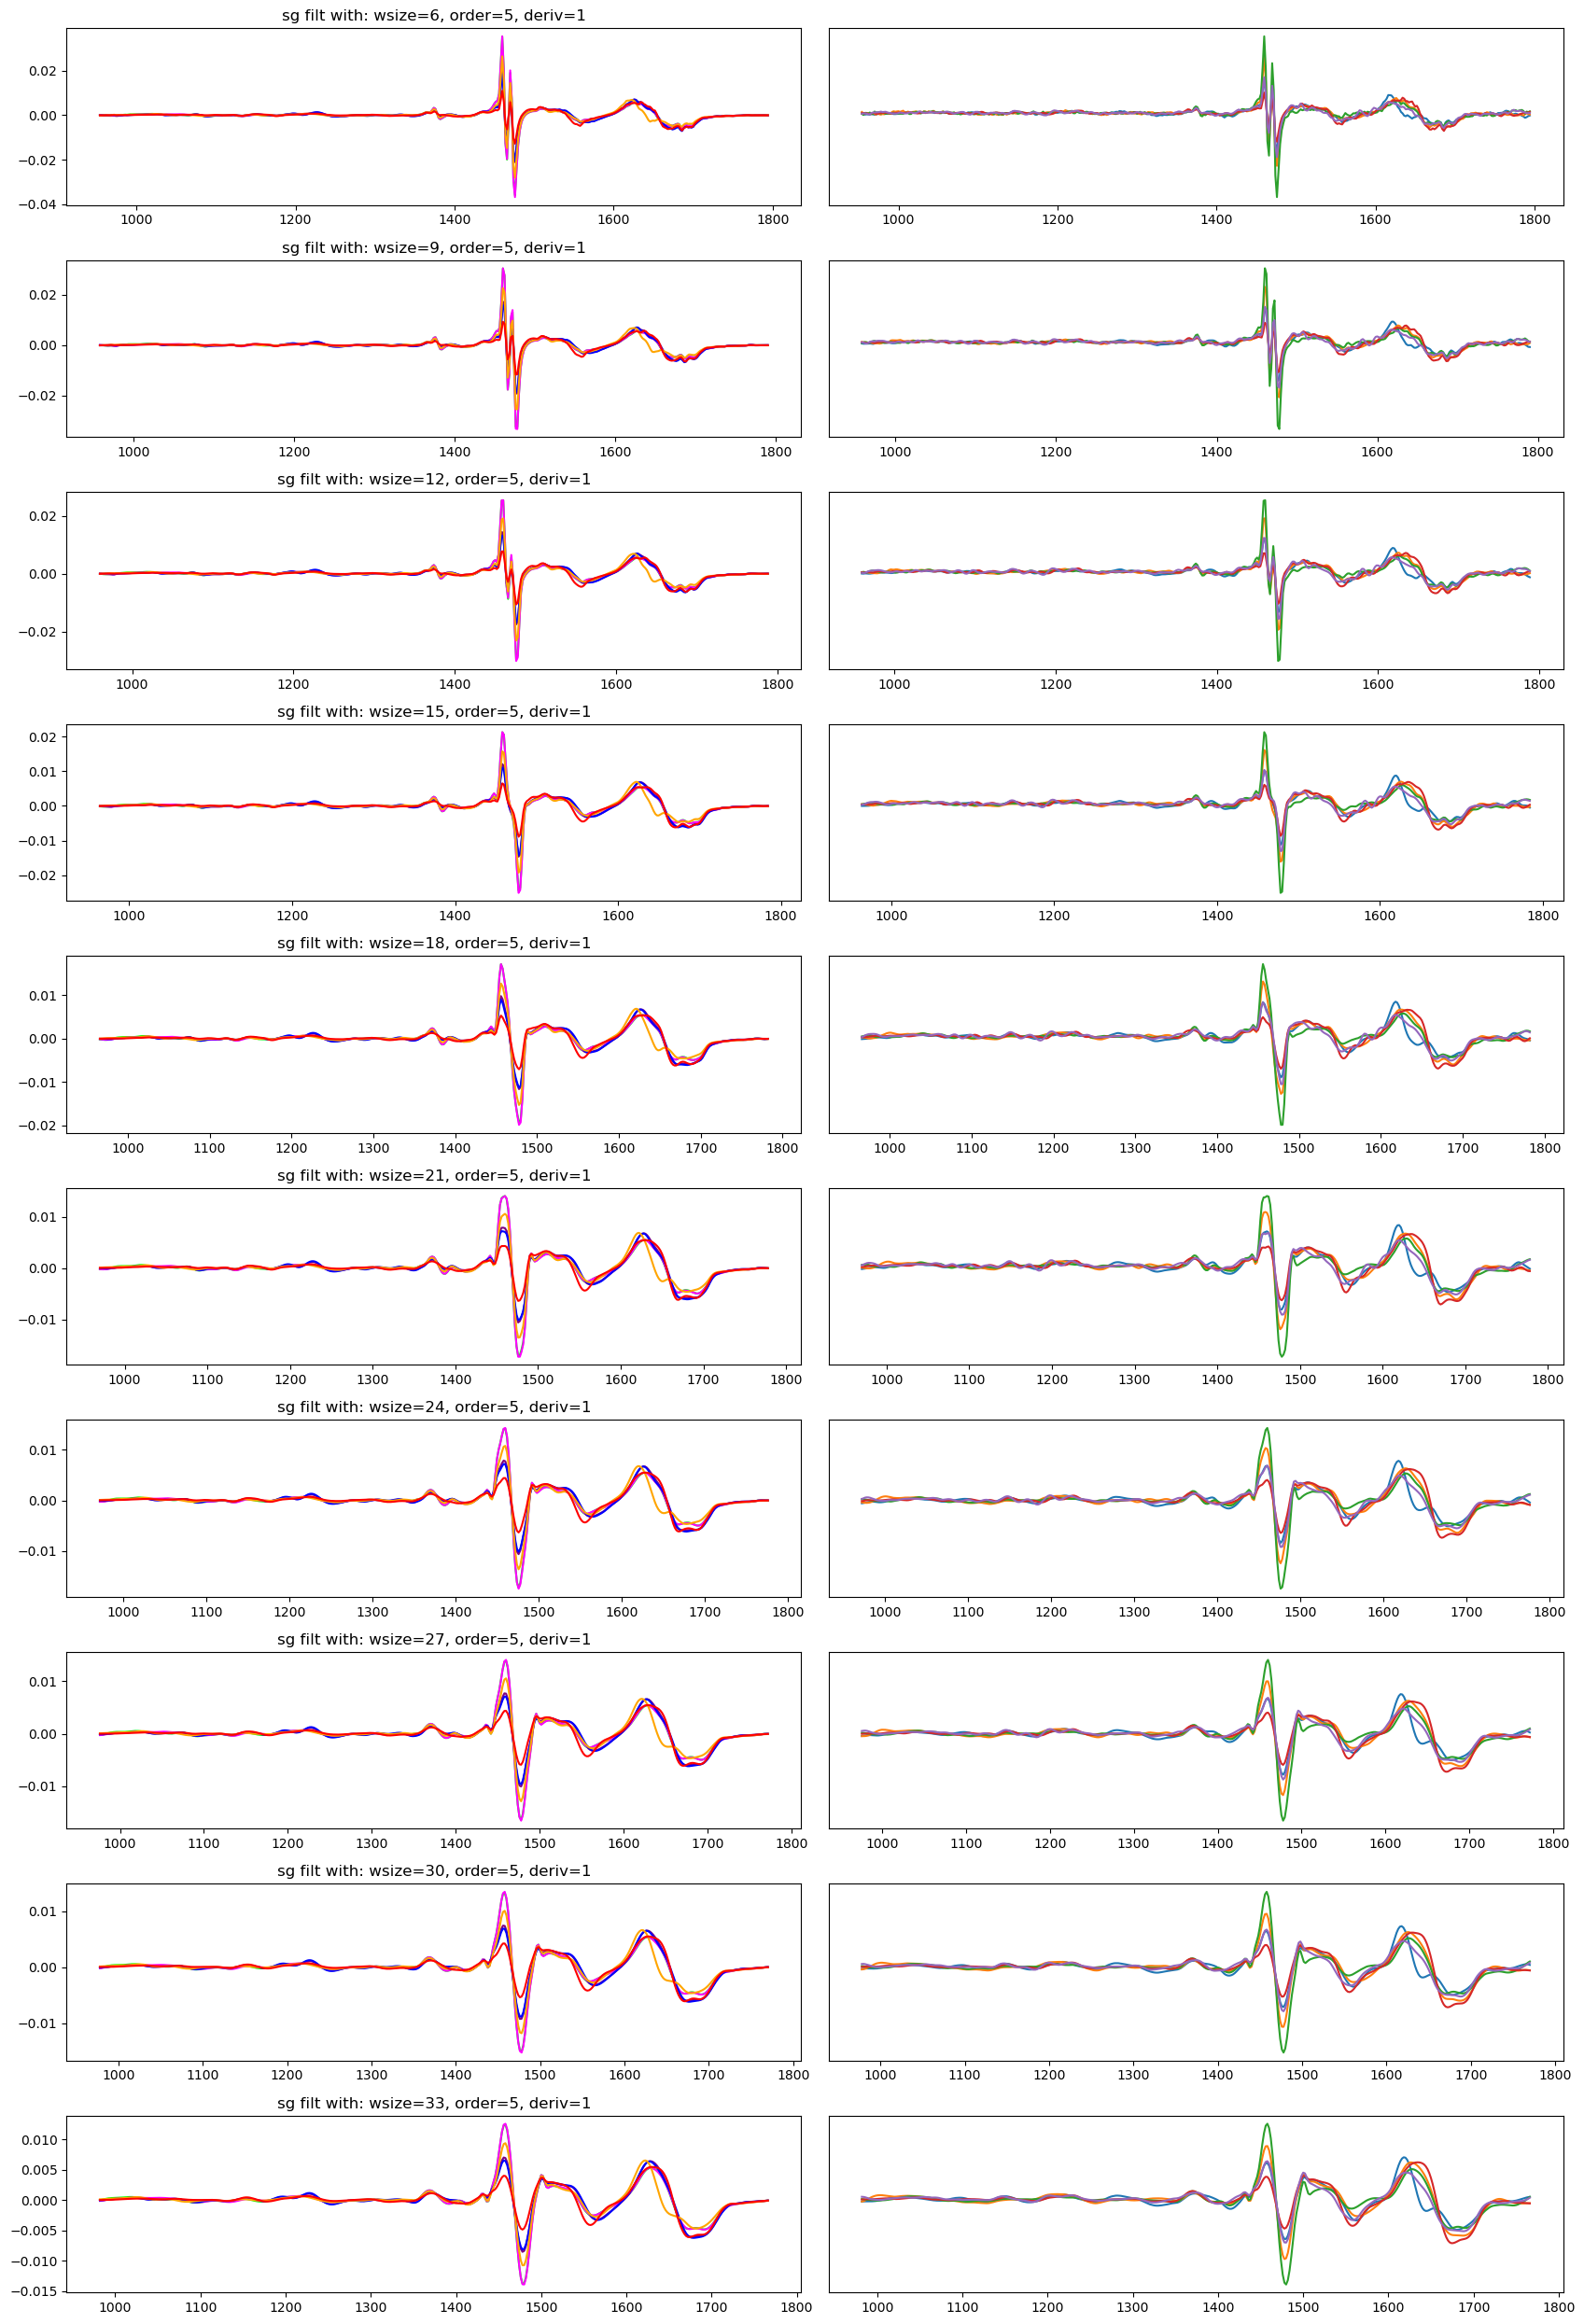

In [18]:
fig,ax = plt.subplots(10,2,figsize=(17,25))


### SHOW AVERAGE SPECTRA FOR PIPELINE
for idx,parameter in enumerate([6,9,12,15,18,21,24,27,30,33]):
    
    wsize = parameter
    order = 5
    deriv = 1
    
    processed_spectra,processed_wavenumbers = preprocess(spectra, wavenumbers,wsize,order,deriv)
    #fig,ax = plt.subplots(figsize=(14,4))
    for cls in range(len(annotation_class_names)):
        ax[idx,0].plot(
            processed_wavenumbers,
            np.mean(processed_spectra[np.where(labels == cls)], axis=0),
            color=annotation_class_colors[cls]/255.0,
            label=annotation_class_names[cls]
        )
    
    for ridx in [1000,2000,3000,4000,5000]:
        ax[idx,1].plot(
            processed_wavenumbers,
            processed_spectra[ridx])
    ax[idx,1].set_yticks([])
    ax[idx,0].set_title(f"sg filt with: wsize={wsize}, order={order}, deriv={deriv}")
        
fig.tight_layout()